# The Price Engine (Machine Learning)

This is the "Brain" of our project. We will use Linear Regression.

It's a formula that finds the best relationship between mileage, year, and price.

In [ ]:
import pandas as pd

# Read our own data
data = pd.read_csv("../data/ussalescars_juanmerino_train.zip")
data.head()

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0


## 1. EDA - Exploratory Data Analysis
Take a look of our columns to check which kind of encoding or transformation is needed.

In [ ]:
# In case a plot is needed
from matplotlib import pyplot as plt

In [15]:
# Check basic information about the dataset
print("Dataset Shape:", data.shape)

print("\nMissing Values:")
print(data.isnull().sum())

Dataset Shape: (144867, 7)

Missing Values:
Brand          0
Model          0
Year           0
Status         0
Mileage    88953
Dealer       328
Price       3911
dtype: int64


* Mileage, Dealer and even Price is missing some values.
* We will not be able to use missing prices and we need to decide if **Dealer** and **Mileage** are important.
* Mileage seems important and missing values can be handle by some machine learning models if needed.

In [16]:
# Unique values per column
print("\nUnique Values per Column:")
print(data.nunique())

print("\nData Types:")
print(data.dtypes)


Unique Values per Column:
Brand         62
Model        642
Year          58
Status         3
Mileage    44136
Dealer     11475
Price      48781
dtype: int64

Data Types:
Brand       object
Model       object
Year         int64
Status      object
Mileage    float64
Dealer      object
Price      float64
dtype: object


* Brand and Status are candidates to be One-Hot encoded.
* Numbers does not need encoding (Year, Mileage).
* Model can be encoded but need some revision while Dealer seems so unique that will not be relevant for a model (further review).

In [20]:
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
                Year        Mileage         Price
count  144867.000000   55914.000000  1.409560e+05
mean     2021.374716   52720.606485  5.267889e+04
std         3.995397   44014.784892  4.221504e+04
min      1959.000000       0.000000  1.000000e+00
25%      2021.000000   20116.000000  3.211000e+04
50%      2023.000000   41417.500000  4.707200e+04
75%      2024.000000   73590.750000  6.531125e+04
max      2024.000000  419096.000000  8.078160e+06


* **Year** seems well defined, although some cars are way too old, need to check the distribution.
* **Mileage** have some big values but nothing out of ordinary (max = 419k miles).
* **Price** does have outliers, there are cars up to 8 million USD. Need to check if those should be taken in consideration.

### 1.1. Is Dealer not relevant?
We can check if there is any particular dealer with higher or lower prices than the average. If that is so, we can flag those dealers to create a new feature for our model.

In [ ]:
# YOUR CODE HERE

### 1.2. How to encode model properly?
Model has 600+ unique values, so a one-hot encoding will be too big to handle. Something like 50 or less unique values should be encoded, for the rest we have to review what to do with them.

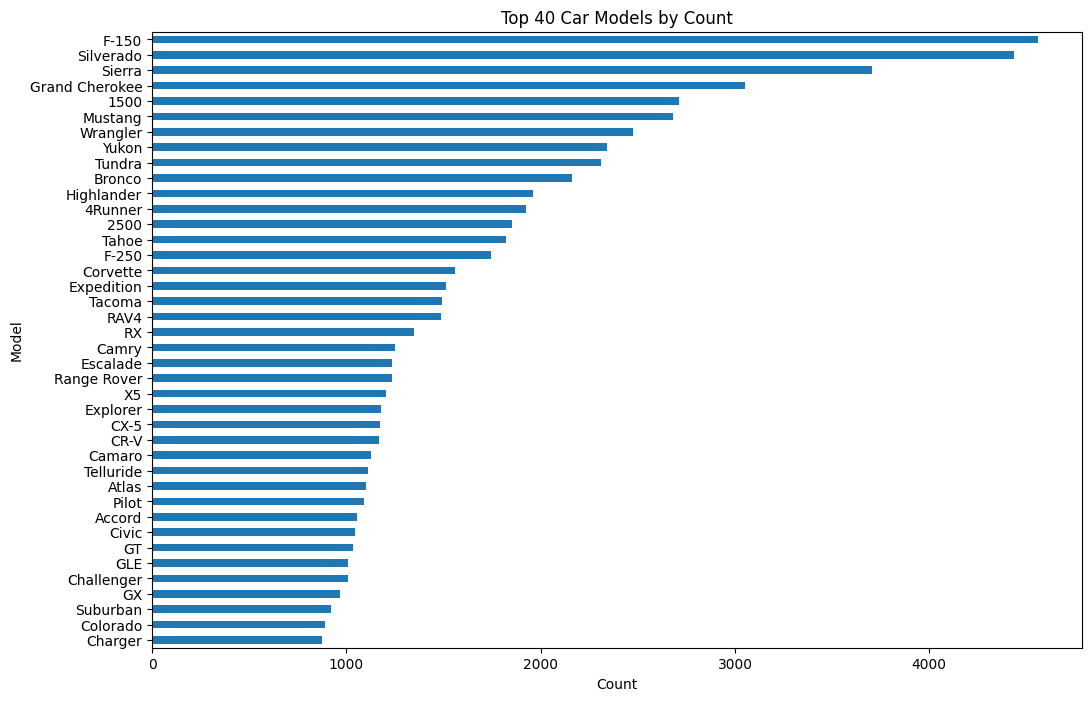

In [23]:
# Bar plot of top 40 car models
data['Model'].value_counts().head(40).sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.xlabel('Count')
plt.ylabel('Model')
plt.title('Top 40 Car Models by Count')
plt.show()

In [ ]:
# YOUR CODE HERE

## 3. TRAIN THE MODEL(S)
This is where the AI "learns" the patterns.

In [ ]:
# Always split your data into train, validation and test sets
from sklearn.model_selection import train_test_split
# Import the models you will train
from sklearn.linear_model import LinearRegression

In [24]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# print("--- TRAINING COMPLETE ---")

## 4. THE TEST DRIVE
Let's see how the AI performs on the "Exam" (Test Data)

In [ ]:
# You need a metric to evaluate any model
from sklearn.metrics import mean_absolute_error

In [ ]:
# predictions = model.predict(X_test)

# print("\n--- TEST RESULTS ---")
# for real, pred in zip(y_test, predictions):
#     print(f"Actual Price: ${real} | AI Prediction: ${pred:,.2f}")

# # How much was the AI off by on average?
# error = mean_absolute_error(y_test, predictions)
# print(f"\nAverage Error: ${error:,.2f}")

## 5. PREDICT A CUSTOM CAR
We can use the ones with no prices in the original dataset.

In [ ]:
# custom_car = [[2019, 40000, 0, 0, 0, 1]]
# prediction = model.predict(custom_car)

# print("\n--- CUSTOM PREDICTION ---")
# print(f"Predicted price for the 2019 Toyota: ${prediction[0]:,.2f}")